In [241]:
## NAMA: WIRA DWI SUSANTO
## NIM: 17.01.53.0053
## MATA KULIAH: MACHINE LEARNING
## UJIAN: UAS
## KELAS: A1

#Apriori Order Details Dataset

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Install Library/Package untuk Apriori

In [242]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [243]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [244]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Install Library Lainnya

In [245]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [246]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import squarify
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

# Membaca Data dari dataset yang telah ditambahkan

In [247]:
df1 = pd.read_csv('order_details.csv', encoding="ISO-8859-1")
df1.head()

,orderID,productID,unitPrice,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


# Menghapus Header dan melakukan pengodean menggunakan ISO-8859-1 

In [248]:
df1 = pd.read_csv('order_details.csv', encoding="ISO-8859-1", header=None)
df1.head()

,0,1,2,3,4
0,orderID,productID,unitPrice,quantity,discount
1,10248,11,14.00,12,0
2,10248,42,9.80,10,0
3,10248,72,34.80,5,0
4,10249,14,18.60,9,0


# Gunakan fungsi shape untuk menampilkan banyaknya elemen di setiap dimensi array

In [249]:
df1.shape

(2156, 5)

# Menampilkan 10 data teratas

In [250]:
df1.head(10)

,0,1,2,3,4
0,orderID,productID,unitPrice,quantity,discount
1,10248,11,14.00,12,0
2,10248,42,9.80,10,0
3,10248,72,34.80,5,0
4,10249,14,18.60,9,0
5,10249,51,42.40,40,0
6,10250,41,7.70,10,0
7,10250,51,42.40,35,0.15
8,10250,65,16.80,15,0.15
9,10251,22,16.80,6,0.05


# Menampilkan informasi ekor dataset

In [251]:
df1.tail()

,0,1,2,3,4
2151,11077,64,33.25,2,0.03
2152,11077,66,17.00,1,0
2153,11077,73,15.00,2,0.01
2154,11077,75,7.75,4,0
2155,11077,77,13.00,2,0


# Coba menampilkan informasi datatype pada dataset

In [252]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2156 non-null   object
 1   1       2156 non-null   object
 2   2       2156 non-null   object
 3   3       2156 non-null   object
 4   4       2156 non-null   object
dtypes: object(5)
memory usage: 84.3+ KB


# Ketika ingin menggunakan apriori, kita perlu mengubahnya ke dalam list format, seperti berikut ini.

In [253]:
transactions = []
for i in range(0,len(df1)):
    transactions.append([str(df1.values[i,j]) for j in range(0,5) if str(df1.values[i,j])!='0'])

In [254]:
transactions[0]

['orderID', 'productID', 'unitPrice', 'quantity', 'discount']

# Kita membutuhkan data untuk banyak dilakukan preprocessing dengan menggunakan fungsi TransactionEncoder()

In [255]:
t = TransactionEncoder()
data=t.fit_transform(transactions)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

(2156, 1046)

# Menampilkan data head

In [256]:
data.head()

,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.2,0.25,...,9.80,90,91,97.00,99.00,discount,orderID,productID,quantity,unitPrice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Sekarang, kita coba pertimbangkan 20 item teratas yang mungkin sering dibeli dan atur/ubah figsizenya.

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, '20'),
 Text(1, 0, '30'),
 Text(2, 0, '10'),
 Text(3, 0, '0.05'),
 Text(4, 0, '15'),
 Text(5, 0, '0.1'),
 Text(6, 0, '0.2'),
 Text(7, 0, '0.15'),
 Text(8, 0, '0.25'),
 Text(9, 0, '40'),
 Text(10, 0, '24'),
 Text(11, 0, '60'),
 Text(12, 0, '35'),
 Text(13, 0, '12'),
 Text(14, 0, '18.00'),
 Text(15, 0, '25'),
 Text(16, 0, '6'),
 Text(17, 0, '2'),
 Text(18, 0, '21'),
 Text(19, 0, '50')]

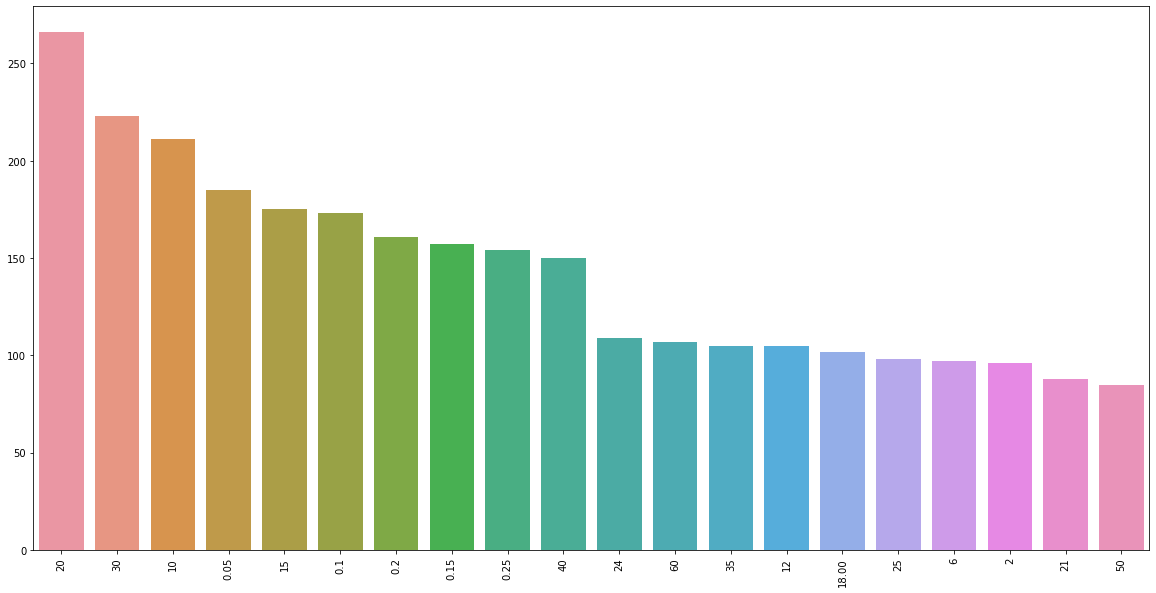

In [257]:
r=data.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

# Buat palet warna, kemudian dipetakan ke value-value

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Tree map of top 20 items')

(0.0, 100.0, 0.0, 100.0)

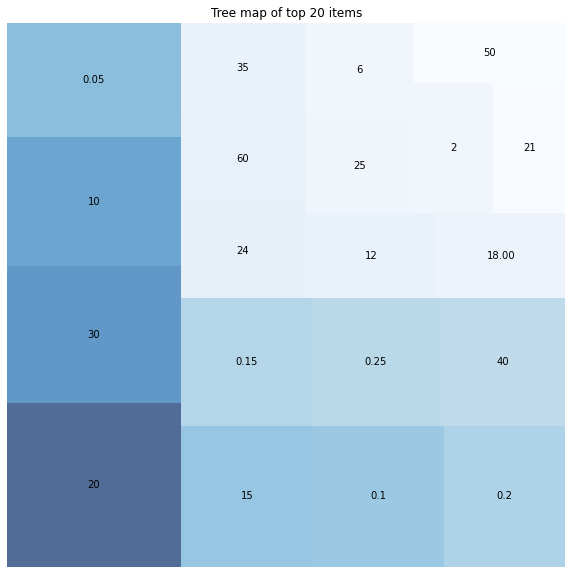

In [258]:
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Tree map of top 20 items")
plt.axis('off')

# Coba kita gunakan nilai support sebanyak setidaknya 5%.

In [259]:
freq_items = apriori(data,min_support=0.05,use_colnames=True)
freq_items

,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.097866,(10)
6,0.081169,(15)
7,0.123377,(20)
8,0.050557,(24)
9,0.103432,(30)


# Sekarang marilah coba *generate* aturan asosiasinya

In [260]:
res = association_rules(freq_items,metric="lift",min_threshold=1.3)

In [261]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [262]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.085807,(0.05),1
1,0.080241,(0.1),1
2,0.072820,(0.15),1
3,0.074675,(0.2),1
4,0.071429,(0.25),1
5,0.097866,(10),1
6,0.081169,(15),1
7,0.123377,(20),1
8,0.050557,(24),1
9,0.103432,(30),1


# Dapatkan Itemset dengan panjang = 2 dan dukungan/support lebih dari 10%

In [263]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.1) ]

,support,itemsets,length


# Dapatkan Itemset dengan panjang = 1 dan dukungan/support lebih dari 10%

In [264]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.1) ]

,support,itemsets,length
7,0.123377,(20),1
9,0.103432,(30),1


# Mengimpor library fpgrowth
# Apriori memerlukan beberapa pemindaian *database* untuk memeriksa support dari setiap kumpulan item yang dihasilkan dan hal ini menyebabkan high cost. Kekurangannya dapat diatasi dengan menggunakan algoritma FP Growth

In [265]:
from mlxtend.frequent_patterns import fpgrowth

# Menjalankan algoritma FP Growth dengan min support 5%

In [266]:
res = fpgrowth(data,min_support=0.05,use_colnames=True)

In [267]:
res

,support,itemsets
0,0.097866,(10)
1,0.069573,(40)
2,0.072820,(0.15)
3,0.081169,(15)
4,0.085807,(0.05)
5,0.123377,(20)
6,0.050557,(24)
7,0.103432,(30)
8,0.074675,(0.2)
9,0.071429,(0.25)


# Buat aturan asosiasi

In [268]:
res = association_rules(res,metric="lift",min_threshold=1)

In [269]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(data,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
...,...,...
134,0.015770,"(62, 49.30)"
135,0.013915,"(53.00, 51)"
136,0.011132,"(7.00, 52)"
137,0.016234,"(59, 55.00)"


,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.025510,(1)
6,0.097866,(10)
7,0.032931,(10.00)
8,0.048701,(12)
9,0.025510,(12.50)


,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.097866,(10)
6,0.032931,(10.00)
7,0.048701,(12)
8,0.081169,(15)
9,0.035714,(16)


,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.097866,(10)
6,0.048701,(12)
7,0.081169,(15)
8,0.047310,(18.00)
9,0.044527,(2)


,support,itemsets
0,0.085807,(0.05)
1,0.080241,(0.1)
2,0.072820,(0.15)
3,0.074675,(0.2)
4,0.071429,(0.25)
5,0.097866,(10)
6,0.081169,(15)
7,0.123377,(20)
8,0.050557,(24)
9,0.103432,(30)


In [270]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(data,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.048701,(12)
1,0.025974,(14.00)
2,0.018553,(11)
3,0.097866,(10)
4,0.022263,(42)
...,...,...
134,0.011596,"(17, 39.00)"
135,0.012059,"(21.00, 11)"
136,0.013915,"(53.00, 51)"
137,0.011596,"(71, 21.50)"


,support,itemsets
0,0.048701,(12)
1,0.025974,(14.00)
2,0.097866,(10)
3,0.022263,(42)
4,0.035714,(5)
5,0.026902,(14)
6,0.069573,(40)
7,0.021800,(41)
8,0.072820,(0.15)
9,0.048701,(35)


,support,itemsets
0,0.048701,(12)
1,0.097866,(10)
2,0.035714,(5)
3,0.069573,(40)
4,0.072820,(0.15)
5,0.048701,(35)
6,0.081169,(15)
7,0.085807,(0.05)
8,0.044991,(6)
9,0.123377,(20)


,support,itemsets
0,0.048701,(12)
1,0.097866,(10)
2,0.069573,(40)
3,0.072820,(0.15)
4,0.048701,(35)
5,0.081169,(15)
6,0.085807,(0.05)
7,0.044991,(6)
8,0.123377,(20)
9,0.045455,(25)


,support,itemsets
0,0.097866,(10)
1,0.069573,(40)
2,0.072820,(0.15)
3,0.081169,(15)
4,0.085807,(0.05)
5,0.123377,(20)
6,0.050557,(24)
7,0.103432,(30)
8,0.074675,(0.2)
9,0.071429,(0.25)


# 

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

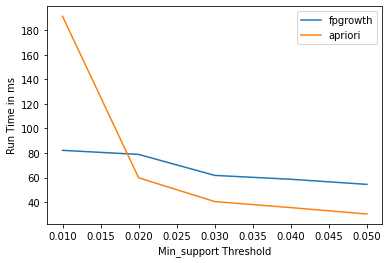

In [271]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")